In [2]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [3]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    "Compute r."
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

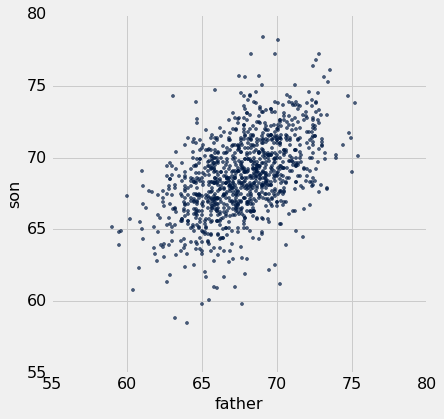

In [14]:
heights = Table.read_table('heights.csv')
fathers = heights.column('father')
sons = heights.column('son')
heights.scatter('father', 'son', s=10)

In [15]:
r = correlation(heights, 'father', 'son')
r

0.50116268080759108

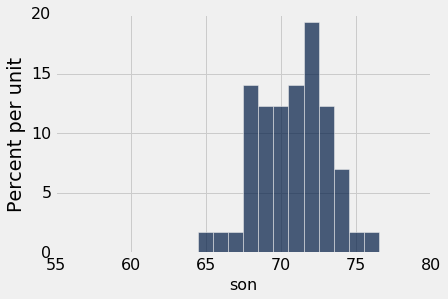

In [10]:
six_foot_fathers = heights.where(np.round(fathers) == 72)
six_foot_fathers.hist('son', bins=np.arange(55.5, 80, 1))

In [20]:
sons_of_sff = np.mean(six_foot_fathers.column('son'))
sons_of_sff

70.728070175438603

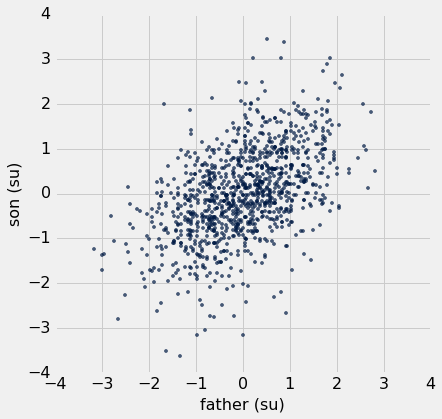

In [11]:
heights_su = Table().with_columns([
        'father (su)', standard_units(fathers),
        'son (su)', standard_units(sons)
    ])
heights_su.scatter('father (su)', s=10)

In [28]:
six_foot_su = (72-np.average(fathers))/np.std(fathers)
six_foot_su

1.5715390503947599

In [21]:
(sons_of_sff - np.average(sons))/np.std(sons)

0.72608234068283417

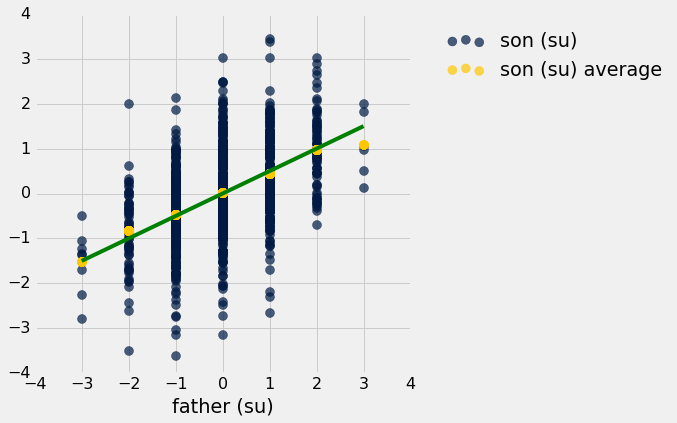

In [23]:
rounded = heights_su.with_column('father (su)', np.round(father_su))
rounded.join('father (su)', rounded.group(0, np.average)).scatter(0, s=80)

import matplotlib.pyplot as plt
plt.plot([-3, 3], [-3 * r, 3 * r], color='g')

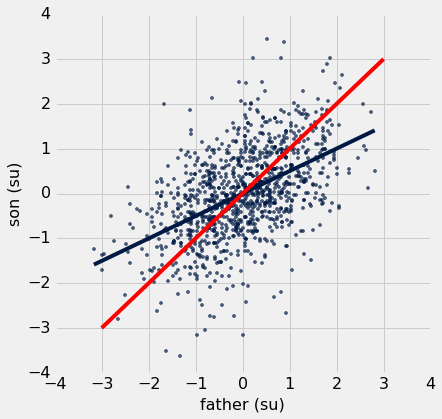

In [169]:
heights_su.scatter('father (su)', s=10, fit_line=True)
# plt.plot([-3, 3], [-3 * r, 3 * r], color='b')
plt.plot([-3, 3], [-3, 3], color='r')

In [29]:
(r * six_foot_su) * np.std(sons) + np.average(sons)

70.901226243944336

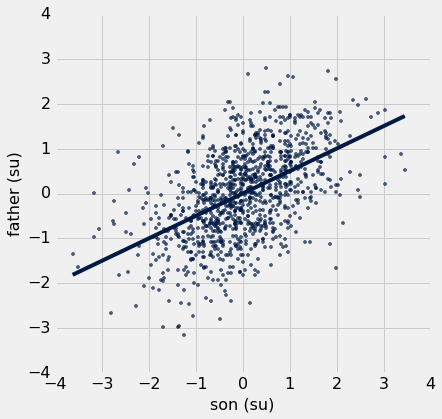

In [30]:
heights_su.scatter('son (su)', s=10, fit_line=True)

## Discussion

In [45]:
x = 90
x_su = (x-70)/10
y_su = 0.75 * x_su
y_su * 12 + 50

68.0

In [48]:
x = 60
x_su = (x-70)/10
y_su = 0.75 * x_su
y_su * 12 + 50

41.0

In [49]:
68-41

27

## Slope & Intercept

In [32]:
def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

[slope(heights, 'father', 'son'), intercept(heights, 'father', 'son')]

[0.51400591254559247, 33.892800540661682]

In [33]:
r

0.50116268080759108

In [34]:
def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

fitted = heights.with_column('son (fitted)', fit(heights, 'father', 'son'))
fitted

father,son,son (fitted)
65,59.8,67.3032
63.3,63.2,66.4294
65,63.3,67.3032
65.8,62.8,67.7144
61.1,64.3,65.2986
63,64.2,66.2752
65.4,64.1,67.5088
64.7,64,67.149
66.1,64.6,67.8686
67,64,68.3312


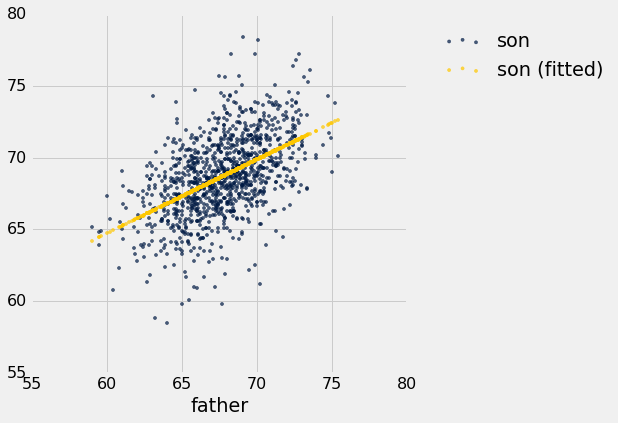

In [35]:
fitted.scatter(0, s=10)

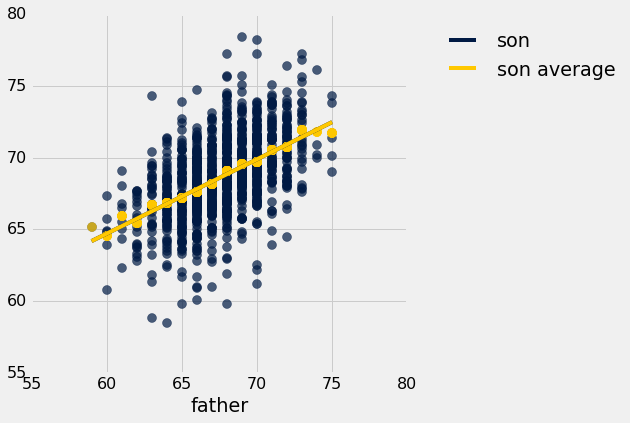

In [112]:
rounded = heights.with_column('father', np.round(heights.column('father')))
rounded.join('father', rounded.group(0, np.average)).scatter(0, s=80, fit_line=True)

## Regression Model

In [171]:
np.random.normal()

0.6424993579321041

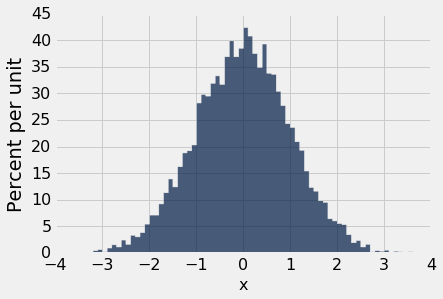

In [173]:
samples = Table('x')
for i in np.arange(10000):
    samples.append([np.random.normal()])
samples.hist(0, bins=np.arange(-4, 4, 0.1))

In [174]:
def signal_and_noise(x, r):
    return r * x + np.random.normal()

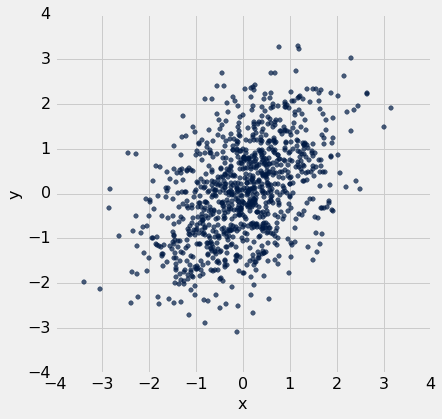

In [176]:
def regression_model(r, sample_size):
    pairs = Table(['x', 'y'])
    for i in np.arange(sample_size):
        x = np.random.normal()
        y = signal_and_noise(x, r)
        pairs.append([x, y])
    return pairs

regression_model(1/2, 1000).scatter('x', 'y')

The true r is  0.5  and the estimated r is  0.417585232177


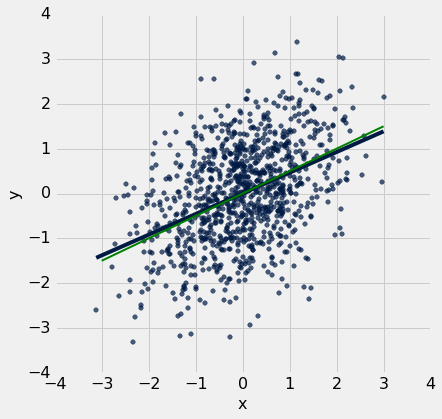

In [177]:
def compare(true_r, sample_size):
    pairs = regression_model(true_r, sample_size)
    estimated_r = correlation(pairs, 'x', 'y')
    pairs.scatter('x', 'y', fit_line=True)
    plt.plot([-3, 3], [-3 * true_r, 3 * true_r], color='g', lw=2)
    print("The true r is ", true_r, " and the estimated r is ", estimated_r)

compare(0.5, 1000)

## Prediction

In [102]:
baby = Table.read_table('baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


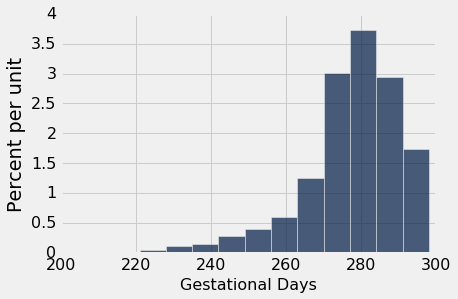

In [113]:
baby.hist(1, bins=np.arange(200, 300, 7))

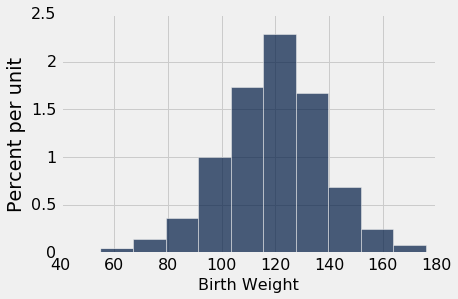

In [106]:
baby.hist(0)

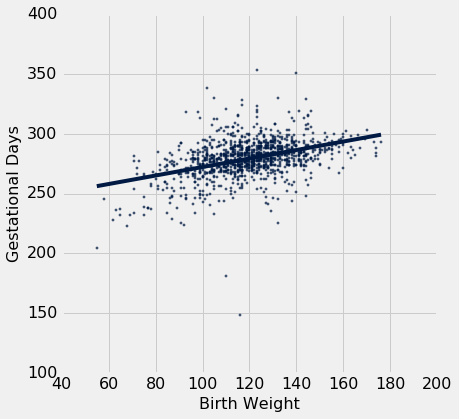

In [107]:
baby.scatter(0, 1, fit_line=True, s=5)

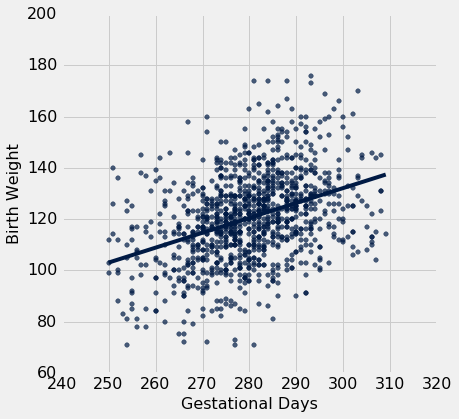

In [110]:
full_term = baby.where(np.logical_and(baby.column(1) >= 250, baby.column(1) < 310))
full_term.scatter(1, 0, fit_line=True)

In [111]:
correlation(full_term, 0, 1)

0.37301819534594199

In [116]:
slope(full_term, 1, 0)

0.58263675747461485

In [126]:
a = slope(full_term, 1, 0)
b = intercept(full_term, 1, 0)
a * 290 + b

126.33785752202166

In [127]:
def predict(t, x, y, new_x_value):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * new_x_value + b
predict(full_term, 1, 0, 290)

126.33785752202166

## Variability in predictions

In [128]:
full_term.num_rows

1093

In [156]:
sample_size = 100
predict(full_term.sample(sample_size), 1, 0, 290)

128.1619504807361

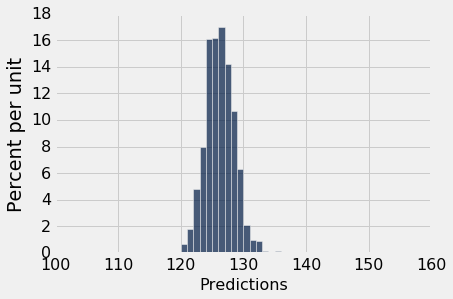

In [163]:
def sample_predict(new_x_value):
    predictions = Table(['Predictions'])
    for i in np.arange(1000):
        predicted = predict(full_term.sample(sample_size), 1, 0, new_x_value)
        predictions.append([predicted])
    predictions.hist(0, bins=np.arange(100, 160))
sample_predict(290)

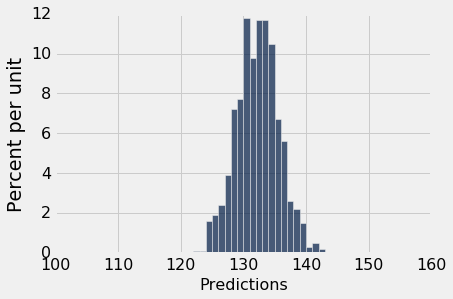

In [164]:
sample_predict(300)

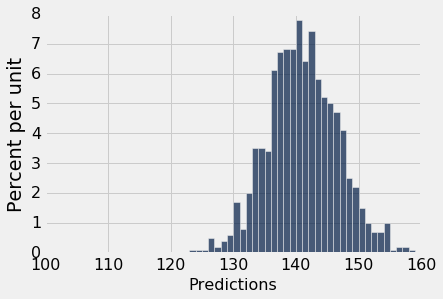

In [167]:
sample_predict(315)